<a href="https://colab.research.google.com/github/azkbrqlna/2025-ComputerVision/blob/main/Jobsheet2_KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

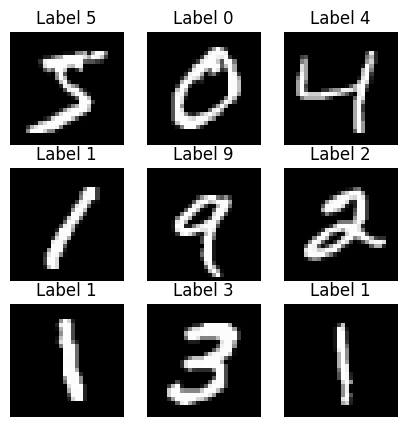

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh 9 gambar pertama
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

### Tugas Kecil : Cobalah ganti `range(9)` dengan `range(25)` untuk menampilkan lebih banyak contoh!

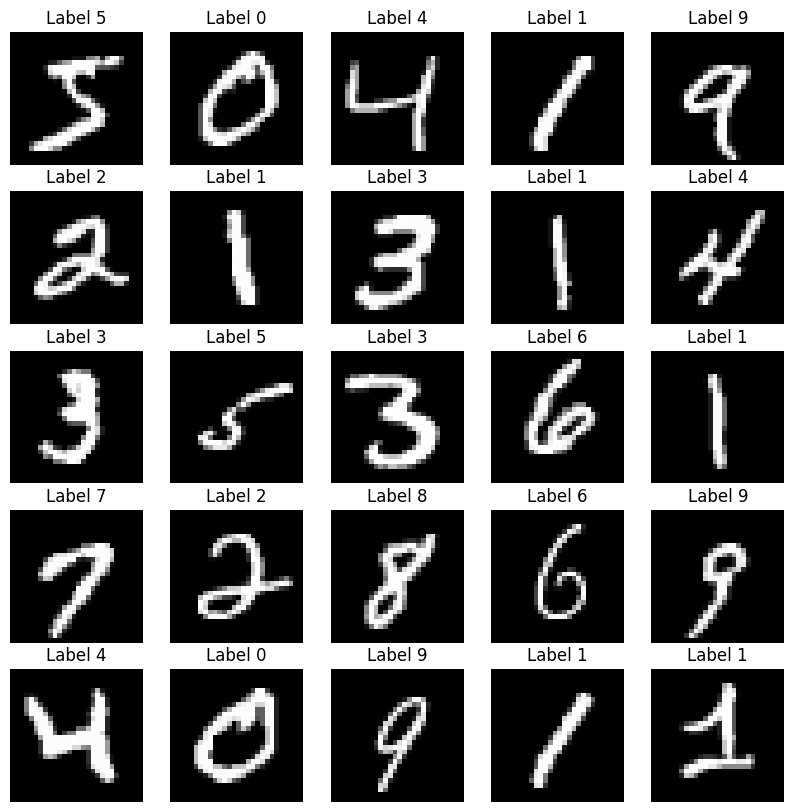

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9101


### Tugas Kecil : Ubah kernel dari `linear` menjadi `rbf`. Bagaimana pengaruhnya terhadap

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9513


## Praktikum D3 - Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8925 - loss: 0.3671 - val_accuracy: 0.9798 - val_loss: 0.0747
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0687 - val_accuracy: 0.9825 - val_loss: 0.0616
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9845 - val_loss: 0.0616
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9868 - val_loss: 0.0543
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9860 - val_loss: 0.0575


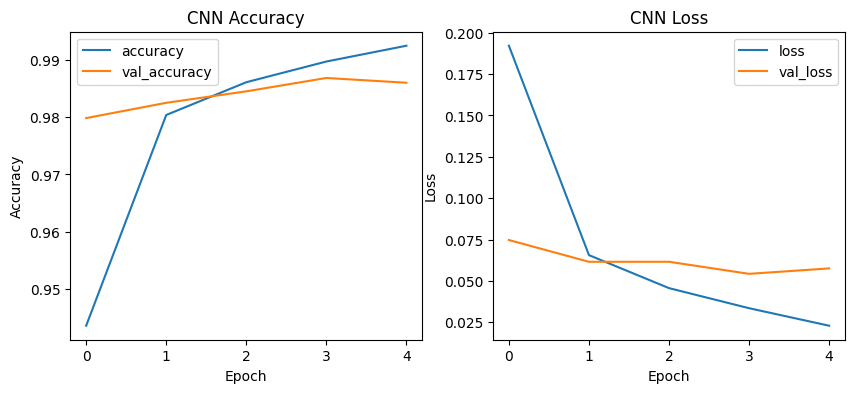

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?



In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), # Saya menambahkan ini
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'x_train' is not defined

## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3669 - loss: 1.7338 - val_accuracy: 0.5776 - val_loss: 1.2154
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5926 - loss: 1.1647 - val_accuracy: 0.6422 - val_loss: 1.0429
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6449 - loss: 1.0122 - val_accuracy: 0.6504 - val_loss: 1.0100
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6853 - loss: 0.9057 - val_accuracy: 0.6666 - val_loss: 0.9475
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7124 - loss: 0.8333 - val_accuracy: 0.7016 - val_loss: 0.8876
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7233 - loss: 0.7893 - val_accuracy: 0.7048 - val_loss: 0.8754
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7519 - loss: 0.7149 - val_accuracy: 0.6834 - val_loss: 0.9349
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7660 - loss: 0.6689

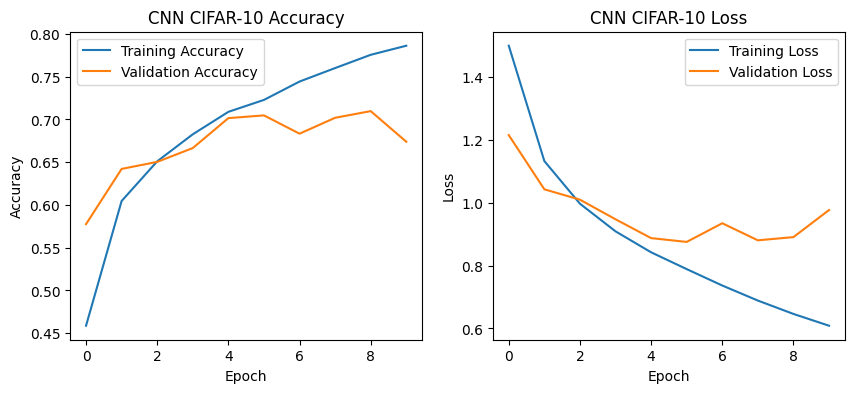

In [15]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil: Coba tambahkan `Dropout(0.5)` sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.2667 - loss: 1.9638 - val_accuracy: 0.4940 - val_loss: 1.4280
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.4283 - loss: 1.5617 - val_accuracy: 0.5370 - val_loss: 1.2941
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.4739 - loss: 1.4395 - val_accuracy: 0.5746 - val_loss: 1.2033
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5029 - loss: 1.3622 - val_accuracy: 0.5990 - val_loss: 1.1713
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.5305 - loss: 1.2859 - val_accuracy: 0.6196 - val_loss: 1.0808
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.5506 - loss: 1.2434 - val_accuracy: 0.6392 - val_loss: 1.0354
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5744 - loss: 1.1935 - val_accuracy: 0.6508 - val_loss: 1.0026
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.5870 -

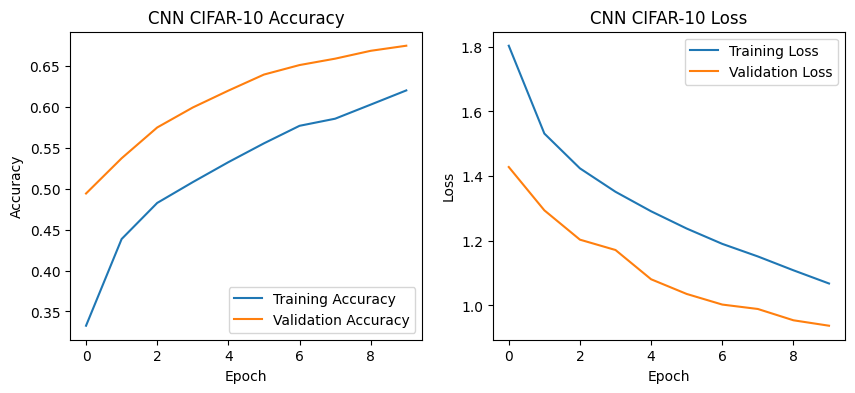

In [16]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5 - Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4627 - loss: 1.5424 - val_accuracy: 0.5698 - val_loss: 1.2499
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5785 - loss: 1.2069 - val_accuracy: 0.5960 - val_loss: 1.1552
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6024 - loss: 1.1431 - val_accuracy: 0.5954 - val_loss: 1.1401
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6094 - loss: 1.1102 - val_accuracy: 0.6108 - val_loss: 1.1155
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6313 - loss: 1.0591 - val_accuracy: 0.6156 - val_loss: 1.1051


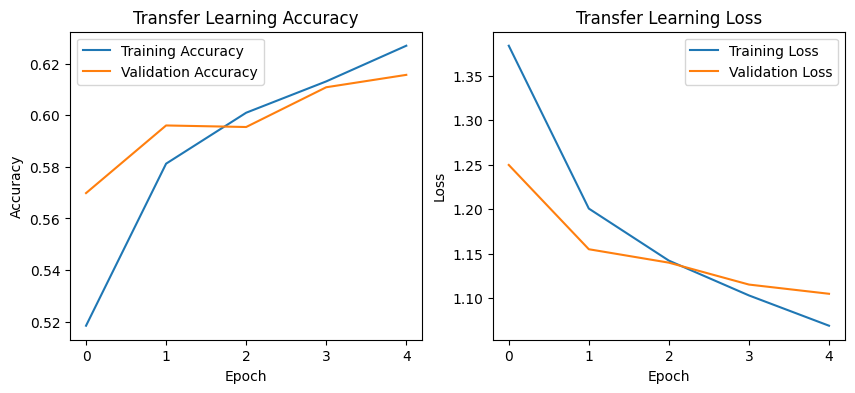

In [16]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari `base_model `(fine-tuning). Bagaimana akurasinya berubah?

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4967 - loss: 1.4343 - val_accuracy: 0.5990 - val_loss: 1.1592
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6284 - loss: 1.0605 - val_accuracy: 0.6362 - val_loss: 1.0461
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6546 - loss: 0.9781 - val_accuracy: 0.6428 - val_loss: 1.0140
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6767 - loss: 0.9140 - val_accuracy: 0.6592 - val_loss: 0.9821
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6913 - loss: 0.8718 - val_accuracy: 0.6594 - val_loss: 0.9879


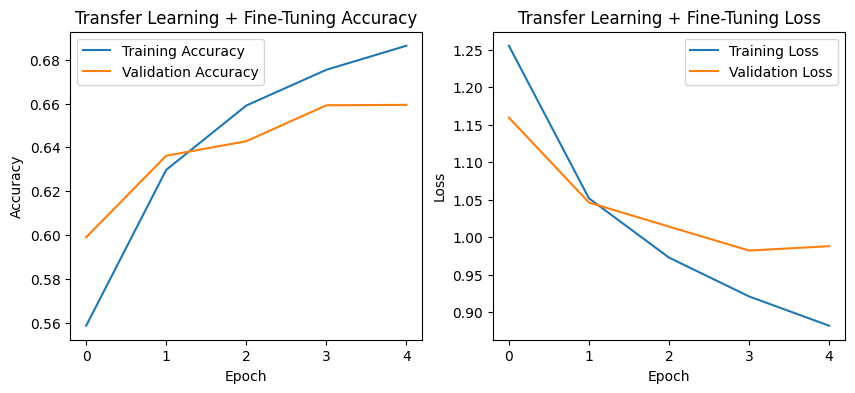

In [17]:
from tensorflow.keras.applications import VGG16

# Load base VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Aktifkan fine-tuning hanya di 2 layer terakhir
base_model.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning + Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning + Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1000
           1       0.71      0.79      0.75      1000
           2       0.66      0.50      0.57      1000
           3       0.51      0.46      0.48      1000
           4       0.51      0.72      0.59      1000
           5       0.70      0.40      0.51      1000
           6       0.55      0.83      0.66      1000
           7       0.73      0.71      0.72      1000
           8       0.75      0.81      0.78      1000
           9       0.73      0.70      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



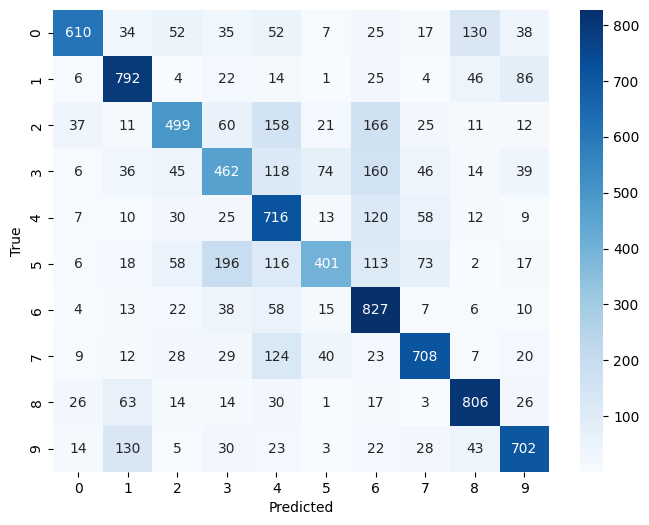

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
